In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info() #info on non null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.dropna(inplace=True) #drop null values and save the result

In [9]:
df.info() #same amount of non null values now

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
#seperate the data frame into two and then train on one and test on one
from sklearn.model_selection import train_test_split
X=df.drop('median_house_value',axis=1) #drop the column so we have the data frame without this column
y=df['median_house_value'] #y will only contain the value of this column without the rest of the datasets columns

In [14]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2) #20% of the data will be reserved for evaluating

In [16]:
#test correlation of the data so we join both the test datasets
train_data=X_train.join(y_train)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11130,-117.93,33.85,33.0,2489.0,546.0,1857.0,444.0,2.9474,<1H OCEAN,178400.0
18087,-122.06,37.30,11.0,5488.0,706.0,1947.0,641.0,10.7326,<1H OCEAN,500001.0
19372,-120.79,37.82,17.0,4227.0,729.0,1809.0,679.0,3.2667,INLAND,269500.0
1670,-122.23,38.05,52.0,1736.0,358.0,638.0,297.0,2.5517,NEAR BAY,147100.0
4706,-118.34,34.06,52.0,1482.0,336.0,768.0,300.0,3.7167,<1H OCEAN,327300.0
...,...,...,...,...,...,...,...,...,...,...
17876,-121.99,37.39,25.0,3495.0,834.0,2484.0,797.0,4.8145,<1H OCEAN,230700.0
10613,-117.80,33.67,5.0,2638.0,521.0,1179.0,480.0,5.7759,<1H OCEAN,240000.0
6259,-117.95,34.05,35.0,1309.0,276.0,1113.0,253.0,4.3750,<1H OCEAN,156500.0
5401,-118.42,34.03,44.0,904.0,176.0,358.0,158.0,3.3542,<1H OCEAN,344200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

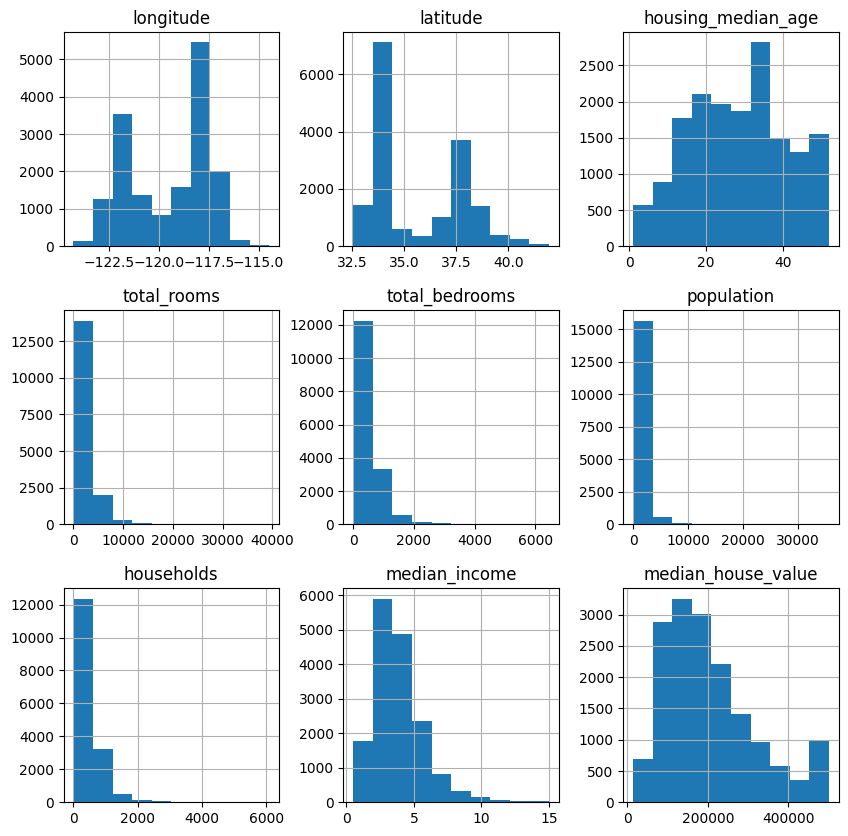

In [19]:
#analyse the data
train_data.hist(figsize=(10,10))

<Axes: >

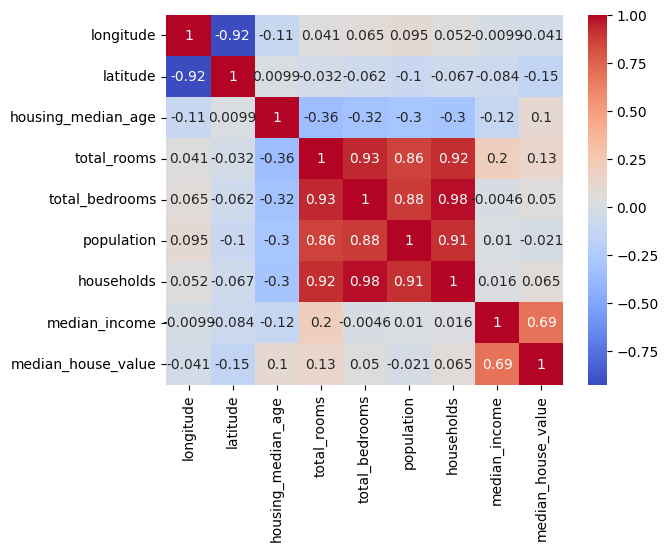

In [26]:
plt.figsize=(10,10) #adjust figure size
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='coolwarm') #deterine colour also only show correlation with coulumns that have numeric values

In [28]:
#since the data is skewed we will take the log of those values to get more uniform results
#use numpy to get the log values of these columns
train_data['total_rooms']=np.log(train_data['total_rooms']+1) # so we only get non zero values
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

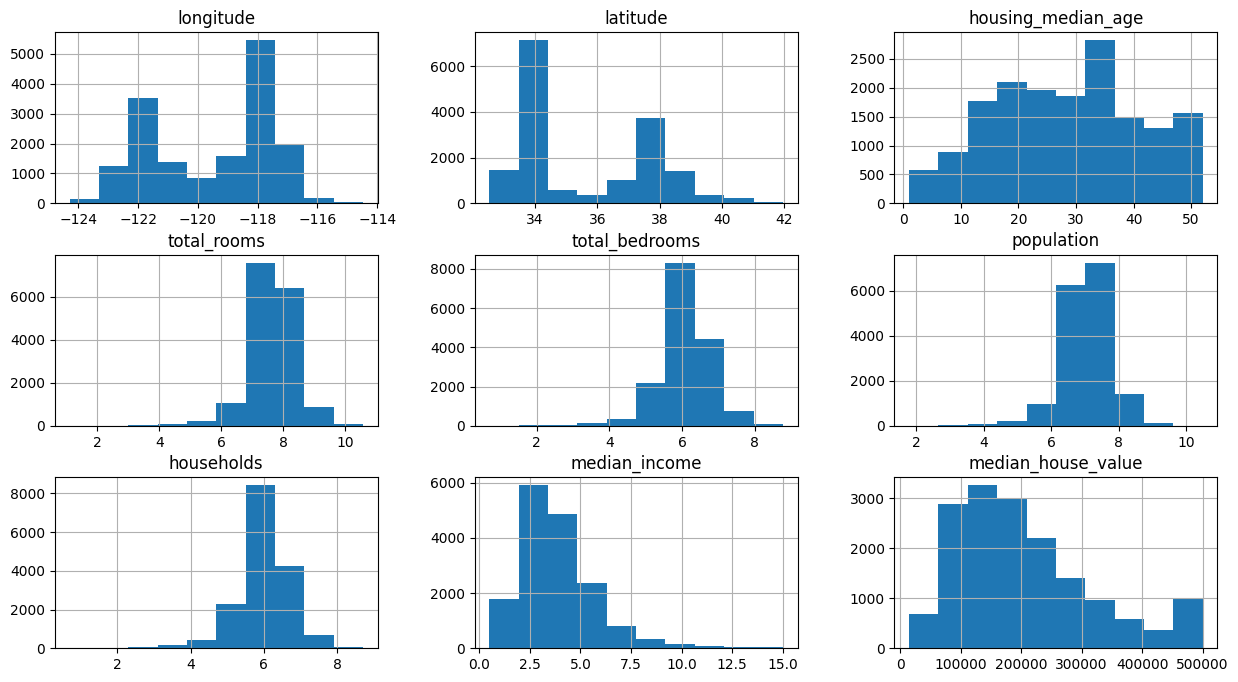

In [30]:
train_data.hist(figsize=(15,8))

In [34]:
# one hot encoding of the column with string values ocean_proximity
#each item in the column will have a value of either one or zero
pd.get_dummies(train_data['ocean_proximity'], dtype=int) #specify we want this in an int datatype or else it says True or false , True=1, false=0


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11130,1,0,0,0,0
18087,1,0,0,0,0
19372,0,1,0,0,0
1670,0,0,0,1,0
4706,1,0,0,0,0
...,...,...,...,...,...
17876,1,0,0,0,0
10613,1,0,0,0,0
6259,1,0,0,0,0
5401,1,0,0,0,0


In [ ]:
#add to data set and then delete ocean proximity
train_data=train_data.join(pd.get_dummies(train_data['ocean_proximity'], dtype=int)).drop('ocean_proximity', axis=1) #axis 1 just mean column

In [42]:
train_data #data set after we dropped the column with string values after one hot encoding

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11130,-117.93,33.85,33.0,7.820038,6.304449,7.527256,6.098074,2.9474,178400.0,1,0,0,0,0
18087,-122.06,37.30,11.0,8.610501,6.561031,7.574558,6.464588,10.7326,500001.0,1,0,0,0,0
19372,-120.79,37.82,17.0,8.349484,6.593045,7.501082,6.522093,3.2667,269500.0,0,1,0,0,0
1670,-122.23,38.05,52.0,7.459915,5.883322,6.459904,5.697093,2.5517,147100.0,0,0,0,1,0
4706,-118.34,34.06,52.0,7.301822,5.820083,6.645091,5.707110,3.7167,327300.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,-121.99,37.39,25.0,8.159375,6.727432,7.818028,6.682109,4.8145,230700.0,1,0,0,0,0
10613,-117.80,33.67,5.0,7.878155,6.257668,7.073270,6.175867,5.7759,240000.0,1,0,0,0,0
6259,-117.95,34.05,35.0,7.177782,5.624018,7.015712,5.537334,4.3750,156500.0,1,0,0,0,0
5401,-118.42,34.03,44.0,6.807935,5.176150,5.883322,5.068904,3.3542,344200.0,1,0,0,0,0


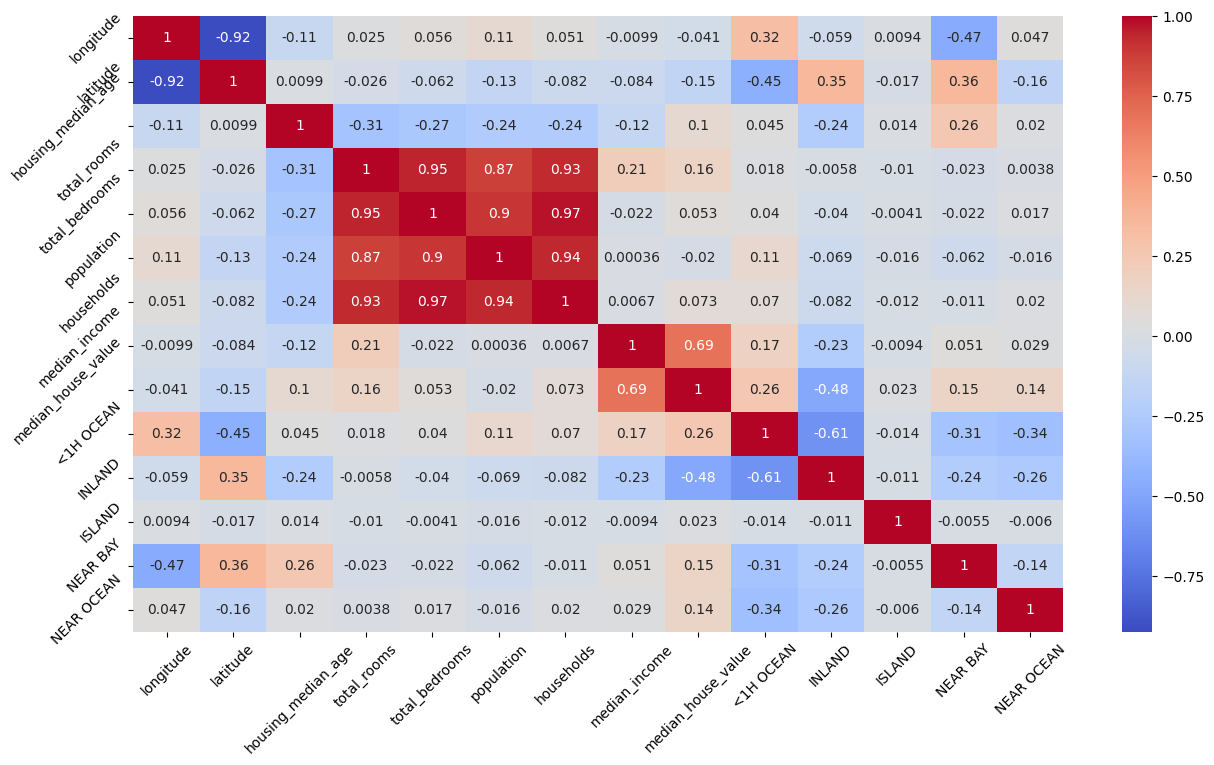

In [49]:
plt.figure(figsize=(15, 8))  # Properly set figure size to account for new columns
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 10})

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=45)  # Rotate y-axis labels

plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

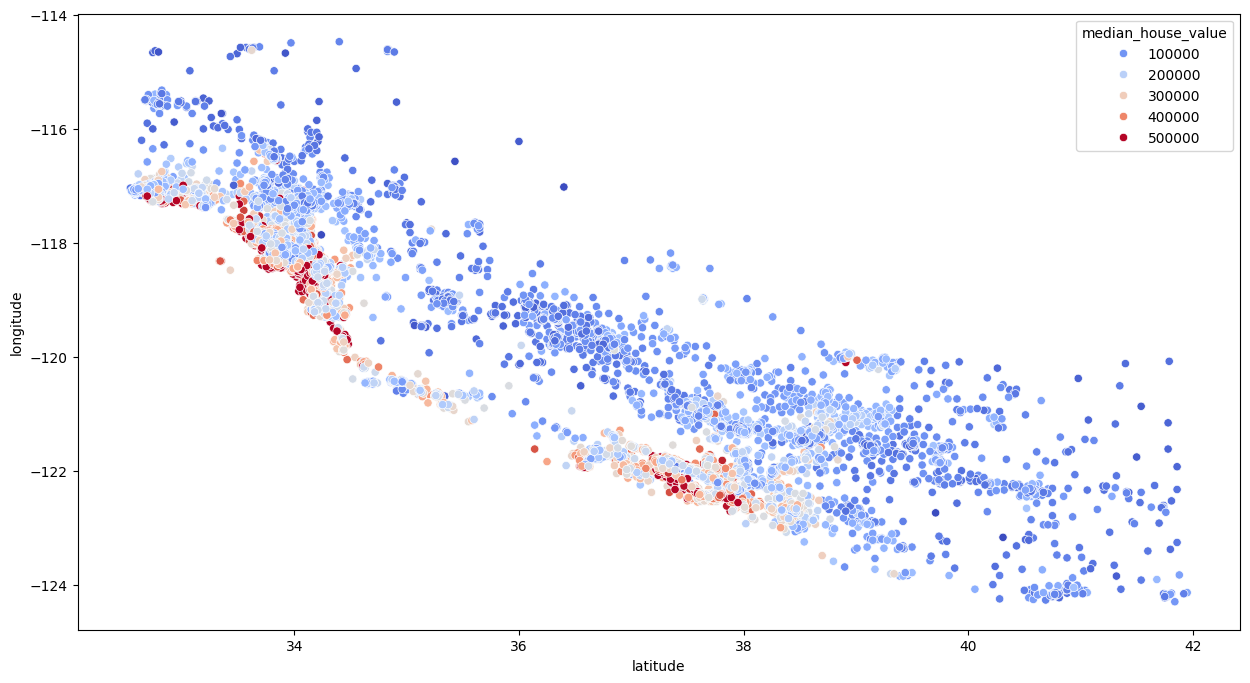

In [52]:
#scatter plot for more clarification
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm') #red means higher house value and blue means lower


In [53]:
#feature engineering (processing data for supervised learning and also manipulating our data set for new features)
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms'] #how many of the rooms are bedrooms
train_data['household_rooms']=train_data['total_rooms']/train_data['households'] #rooms per house


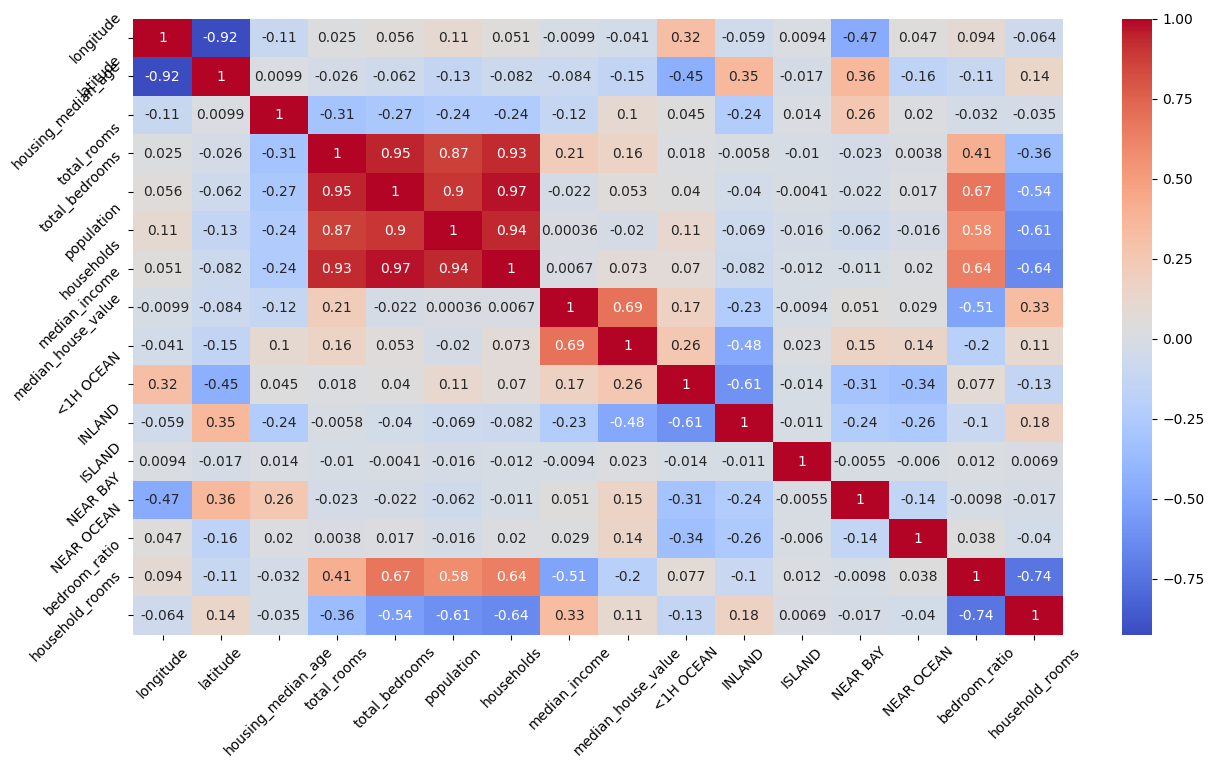

In [54]:
plt.figure(figsize=(15, 8))  #new heat map for the correlation of our new values , bedroom_ratio and household_rooms to our target value median_household_value
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 10})

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=45)  # Rotate y-axis labels

plt.show()

In [67]:
#predict household prices using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #for scaling our data for a better result
scaler=StandardScaler()
#split our dataset again with the new features and values so that means we split it int X_train and y_train again
X_train=train_data.drop('median_house_value', axis=1) #so again in x we want our dataset withought our target val

X_train_scaled=scaler.fit_transform(X_train) #scale our data
y_train=train_data['median_house_value'] #y will be only our target val
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#assuming test data without scaling
test_data=X_test.join(y_test) #make test data

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data['ocean_proximity'], dtype=int)).drop('ocean_proximity', axis=1) #axis 1 just mean column

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

X_test=test_data.drop('median_house_value', axis=1) #so again in x we want our dataset withought our target val
y_test=test_data['median_house_value'] #y will be only our target val


In [63]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14612,-117.18,32.79,30.0,8.556798,7.007601,7.993620,6.970730,3.2661,140400.0,0,0,0,0,1,0.818951,1.227533
11731,-120.81,39.02,30.0,6.693324,5.247024,5.789960,4.990433,2.8155,101000.0,0,1,0,0,0,0.783919,1.341231
15156,-117.04,32.98,16.0,7.195187,5.283204,6.463029,5.267858,6.0226,192900.0,1,0,0,0,0,0.734269,1.365866
10832,-117.93,33.65,34.0,7.669495,6.054439,7.352441,6.063785,4.2036,220100.0,1,0,0,0,0,0.789418,1.264803
12259,-116.95,33.79,20.0,7.783224,6.304449,7.454141,6.297109,1.8845,77700.0,0,1,0,0,0,0.810005,1.236000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322,-118.35,34.08,52.0,7.644441,5.963579,6.812345,5.929589,3.8141,342000.0,1,0,0,0,0,0.780120,1.289202
12537,-121.51,38.55,46.0,7.303843,5.631212,6.276643,5.676754,2.7885,137200.0,0,1,0,0,0,0.770993,1.286623
18115,-122.02,37.30,26.0,7.592870,5.710427,6.829794,5.697093,6.7123,354600.0,1,0,0,0,0,0.752078,1.332762
503,-122.28,37.85,52.0,6.415097,4.983607,5.641907,4.890349,2.9018,119400.0,0,0,0,1,0,0.776856,1.311787


In [69]:
#do the same for test data
X_test_s=scaler.transform(X_test)

In [70]:
#now result with scaled data
regressor.score(X_test_s, y_test)

-350.0063915058013

In [71]:
#without scaling
regressor.score(X_test, y_test)

0.6575884471904475